# EDA for digits data

### Determine run parameters

In [1]:
# ----------------- Parameters for interactive development --------------
P = {
    "workflow.data_lake_root": "/pipeline-outputs/data-lake",
}

In [2]:
# - During automated runs parameters will be injected in the below cell -

In [3]:
# Parameters
P = {
    "workflow.data_lake_root": "/pipeline-outputs/data-lake",
    "workflow.run_environment": "ci",
    "workflow.workflow_run_id": "3ca8a7bf-f232-412c-b3fc-cadfcd34e947",
    "workflow.github.repository": "composable-logs/mnist-digits-demo-pipeline",
    "workflow.github.workflow": "Run automated tests, pipeline and deploy results to static reporting site",
    "workflow.github.runner_name": "GitHub Actions 2",
    "workflow.github.run_id": "5634961309",
    "workflow.github.actor": "matiasdahl",
    "workflow.github.job": "run-tests-pipeline-and-persist-pipeline-outputs",
    "workflow.github.base_ref": "",
    "workflow.github.head_ref": "",
    "workflow.github.sha": "d39200a6f663237a75f89dcb4cfff12776736965",
    "workflow.github.ref": "refs/heads/main",
    "workflow.github.ref_type": "branch",
    "workflow.github.ref_name": "main",
    "workflow.github.event_name": "schedule",
    "_parameters_actor_name": "parameter_for_task_0x23936beac387fcae",
}


In [4]:
# -----------------------------------------------------------------------

---

### Notebook code

In [5]:
from typing import Dict, Tuple
import collections

# -
import matplotlib.pyplot as plt
import mlflow

# -
from composable_logs.tasks.task_opentelemetry_logging import get_task_context

# -
from common.io import datalake_root, read_numpy

In [6]:
# start custom MLFlow server that captures logged data and outputs OpenTelemetry events
ctx = get_task_context(P, use_mlflow_for_logging=True)

2023-07-23 06:34:16,026	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 172.17.0.2:39285...


2023-07-23 06:34:16,037	INFO worker.py:1544 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


/home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:27: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
Use get_job_id() instead
  "job_id": self.job_id,
/home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:28: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
Use get_node_id() instead
  "node_id": self.node_id,


/home/host_user/.local/lib/python3.8/site-packages/ansiwrap/core.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/home/host_user/.local/lib/python3.8/site-packages/ansiwrap/core.py:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/host_user/.local/lib/python3.8/site-packages/textwrap3.py' mode='r' encoding='utf-8'>
  a_textwrap = imp.load_module('a_textwrap', *imp.find_module('textwrap3'))
/home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:27: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
Use get_job_id() instead
  "job_id": self.job_id,
/home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:28: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could s

2023-07-23 06:34:17,524	WARNING worker.py:1866 -- WARNING: 10 PYTHON worker processes have been started on node: 78dcbe874db29017071420ef9ec5177b33a03e3c63cdbb13e2342581 with address: 172.17.0.2. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).


2023-07-23 06:34:18,227	WARNING worker.py:1866 -- WARNING: 12 PYTHON worker processes have been started on node: 78dcbe874db29017071420ef9ec5177b33a03e3c63cdbb13e2342581 with address: 172.17.0.2. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).


(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:27: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
(MLFlowServer pid=968) Use get_job_id() instead
(MLFlowServer pid=968)   "job_id": self.job_id,
(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:28: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
(MLFlowServer pid=968) Use get_node_id() instead
(MLFlowServer pid=968)   "node_id": self.node_id,
(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:32: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by 

Checking MLFlow server is running using {status_url}


(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:27: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
(MLFlowServer pid=968) Use get_job_id() instead
(MLFlowServer pid=968)   "job_id": self.job_id,
(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:28: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
(MLFlowServer pid=968) Use get_node_id() instead
(MLFlowServer pid=968)   "node_id": self.node_id,
(MLFlowServer pid=968) /home/host_user/.local/lib/python3.8/site-packages/ray/runtime_context.py:32: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by 

(MLFlowServer pid=968) INFO:     Started server process [968]
(MLFlowServer pid=968) INFO:     Waiting for application startup.
(MLFlowServer pid=968) INFO:     Application startup complete.
(MLFlowServer pid=968) INFO:     Uvicorn running on http://0.0.0.0:5001 (Press CTRL+C to quit)


In [7]:
X = read_numpy(datalake_root(ctx) / "raw" / "digits.numpy")
y = read_numpy(datalake_root(ctx) / "raw" / "labels.numpy")

(MLFlowServer pid=968) INFO:     172.17.0.2:41490 - "GET /status HTTP/1.1" 200 OK


## Check shapes of digit image and label vectors

In [8]:
X.shape, y.shape

((1797, 64), (1797,))

In [9]:
# labels in y has shape of vector
assert y.shape == (len(y),)

# X and y have compatible shape (ie., both have equal number of rows)
assert X.shape[0] == len(y) == y.shape[0]

# each image is 8x8 pixels
assert X.shape[1] == 8 * 8

In [10]:
mlflow.log_param("nr_digits", len(y))
mlflow.log_param("pixels_per_digit", int(X.shape[1]))

64

(MLFlowServer pid=968) CL: /api/2.0/mlflow/runs/create : POST REQ  {'experiment_id': '0', 'user_id': 'host_user', 'start_time': 1690094060110, 'tags': [{'key': 'mlflow.user', 'value': 'host_user'}, {'key': 'mlflow.source.name', 'value': '/home/host_user/.local/lib/python3.8/site-packages/ipykernel_launcher.py'}, {'key': 'mlflow.source.type', 'value': 'LOCAL'}]}
(MLFlowServer pid=968) CL: /api/2.0/mlflow/runs/create : POST RESP  {'run': {'info': {'run_id': '00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01', 'run_uuid': '00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01', 'artifact_uri': 'ftp://172.17.0.2:5002/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/'}}}
(MLFlowServer pid=968) INFO:     172.17.0.2:41502 - "POST /api/2.0/mlflow/runs/create HTTP/1.1" 200 OK
(MLFlowServer pid=968) CL: /api/2.0/mlflow/runs/log-parameter (post) REQ  {'run_uuid': '00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01', 'key': 'nr_digits', 'value': '1797', 'run_id': '00-87fde42796

## Check distribution of labels

In [11]:
def plot_dict_to_barplot(
    values_dict: Dict[int, int],
    title: str,
    x_label: str,
    y_label: str,
    figsize: Tuple[int, int] = (16, 5),
    font_size: int = 18,
    title_font_size: int = 22,
):
    """
    Draw bar plots from count data in a dict
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    keys, counts = zip(*values_dict.items())  # type: ignore
    ax.bar(keys, counts)
    ax.set_xticks(keys)

    ax.set_title(title + "\n", fontsize=title_font_size)

    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label + "\n", fontsize=font_size)

    ax.tick_params(axis="both", which="major", labelsize=font_size)

    fig.tight_layout()

    return fig

(MLFlowServer pid=968) 2023-07-23 06:34:20,142	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 172.17.0.2:39285...
(MLFlowServer pid=968) 2023-07-23 06:34:20,142	INFO worker.py:1382 -- Calling ray.init() again after it has already been called.
(MLFlowServer pid=968) 2023-07-23 06:34:20,149	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 172.17.0.2:39285...
(MLFlowServer pid=968) 2023-07-23 06:34:20,149	INFO worker.py:1382 -- Calling ray.init() again after it has already been called.


In [12]:
# all labels in y are in set 0, 1, ..., 8, 9 (possible digits)
assert set(y) == set(range(10))

In [13]:
digit_counts: Dict[int, int] = dict(collections.Counter(y))

mlflow.log_dict({str(k): v for k, v in digit_counts.items()}, "counts_per_digit.txt")

(MLFlowServer pid=968) CL: /api/2.0/mlflow/runs/get: GET
(MLFlowServer pid=968) CL: /api/2.0/mlflow/runs/get: RESP  {'run': {'info': {'run_id': '00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01', 'run_uuid': '00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01', 'artifact_uri': 'ftp://172.17.0.2:5002/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/'}}}
(MLFlowServer pid=968) INFO:     172.17.0.2:41502 - "GET /api/2.0/mlflow/runs/get?run_uuid=00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01&run_id=00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01 HTTP/1.1" 200 OK


(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01 550 'No such file or directory.'
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[anonymous] MKD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01 257
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36556-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2

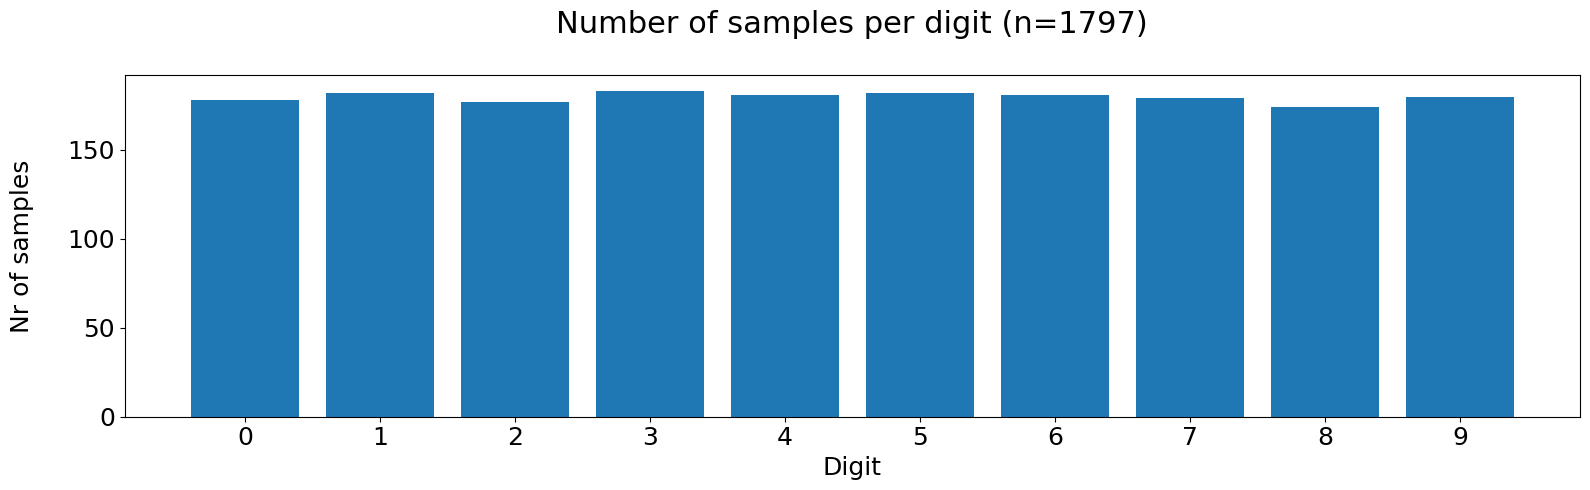

In [14]:
fig = plot_dict_to_barplot(
    digit_counts,
    title=f"Number of samples per digit (n={len(y)})",
    x_label="Digit",
    y_label="Nr of samples",
)

In [15]:
mlflow.log_figure(fig, "logged-images/samples_per_digit.png")

- All digits 0, 1, ..., 8, 9 are (approximatively) equally represented in the data set

## Check distribution of pixel values

In [16]:
assert X.reshape(-1).shape == (X.shape[0] * X.shape[1],)

In [17]:
# all labels in y are in set 0, 1, ..., 8, 9 (possible digits)
assert set(X.reshape(-1)) == set(float(x) for x in range(17))

In [18]:
pixel_value_counts: Dict[int, int] = dict(collections.Counter(X.reshape(-1)))

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images 550 'No such file or directory.'
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[anonymous] MKD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images 257
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:20] 172.17.0.2:36560-[anonymous] STOR /tmp/c

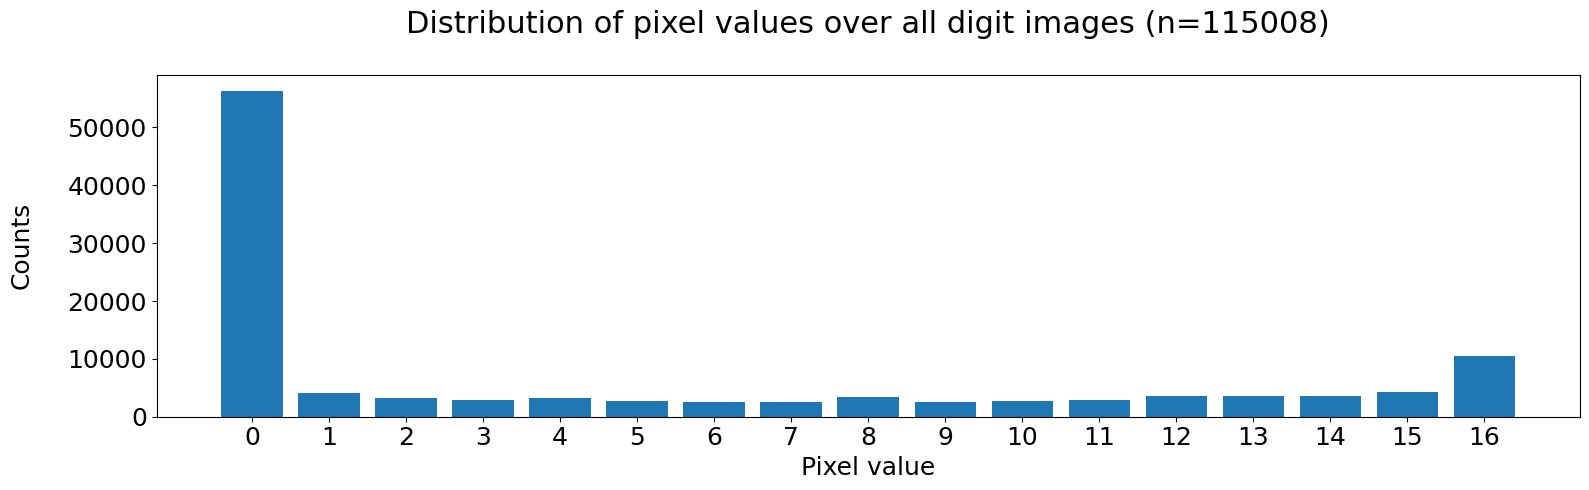

In [19]:
fig = plot_dict_to_barplot(
    pixel_value_counts,
    title=f"Distribution of pixel values over all digit images (n={len(X.reshape(-1))})",
    x_label="Pixel value",
    y_label="Counts",
)

In [20]:
mlflow.log_figure(fig, "logged-images/pixel_value_counts.png")

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/pixel_value_counts.png completed=1 bytes=44631 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:21,287	INFO worker

- The pixel values in the images are encoded with numbers 0, .., 16.
- Pixel value 0 occur most frequently (background color).
- The second most frequent pixel value is 16.0 (digit draw color).

## Plot individual digit images

In [21]:
from common.utils import chunkify, make_panel_image

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36570-[anonymous] FTP session closed (disconnect).


(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 550 'No such file or directory.'
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[anonymous] MKD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 257
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:21] 172.17.0.2:36580-[a

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54414-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54414-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54414-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54414-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54414-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/1-images.png completed=1 bytes=53104 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:22,178	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54416-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54416-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54416-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54416-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54416-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/2-images.png completed=1 bytes=56089 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:22,516	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54428-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54428-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54428-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54428-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:22] 172.17.0.2:54428-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/3-images.png completed=1 bytes=58842 seconds=0.0
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:22,964	IN

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54432-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54432-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54432-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54432-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54432-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/4-images.png completed=1 bytes=56852 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:23,286	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54438-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54438-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54438-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54438-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:23] 172.17.0.2:54438-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/5-images.png completed=1 bytes=57622 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:23,601	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54442-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54442-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54442-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54442-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54442-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/6-images.png completed=1 bytes=56851 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:24,021	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54452-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54452-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54452-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54452-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54452-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/7-images.png completed=1 bytes=56411 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:24,336	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54454-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54454-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54454-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54454-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54454-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/8-images.png completed=1 bytes=57233 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:24,664	

(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54456-[] FTP session opened (connect)
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54456-[anonymous] USER 'anonymous' logged in.
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54456-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54456-[anonymous] CWD /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits 250
(ArtifactFTPServer pid=1057) [I 2023-07-23 06:34:24] 172.17.0.2:54456-[anonymous] STOR /tmp/composable-logs/ftp-0c659598-2b67-43dc-8bb2-422b44284dc6/00-87fde42796bd560e7375db5ad4968ff4-a468db876e5fc946-01/logged-images/digits/9-images.png completed=1 bytes=58619 seconds=0.001
(ArtifactFTPServer pid=1057) 2023-07-23 06:34:24,986	

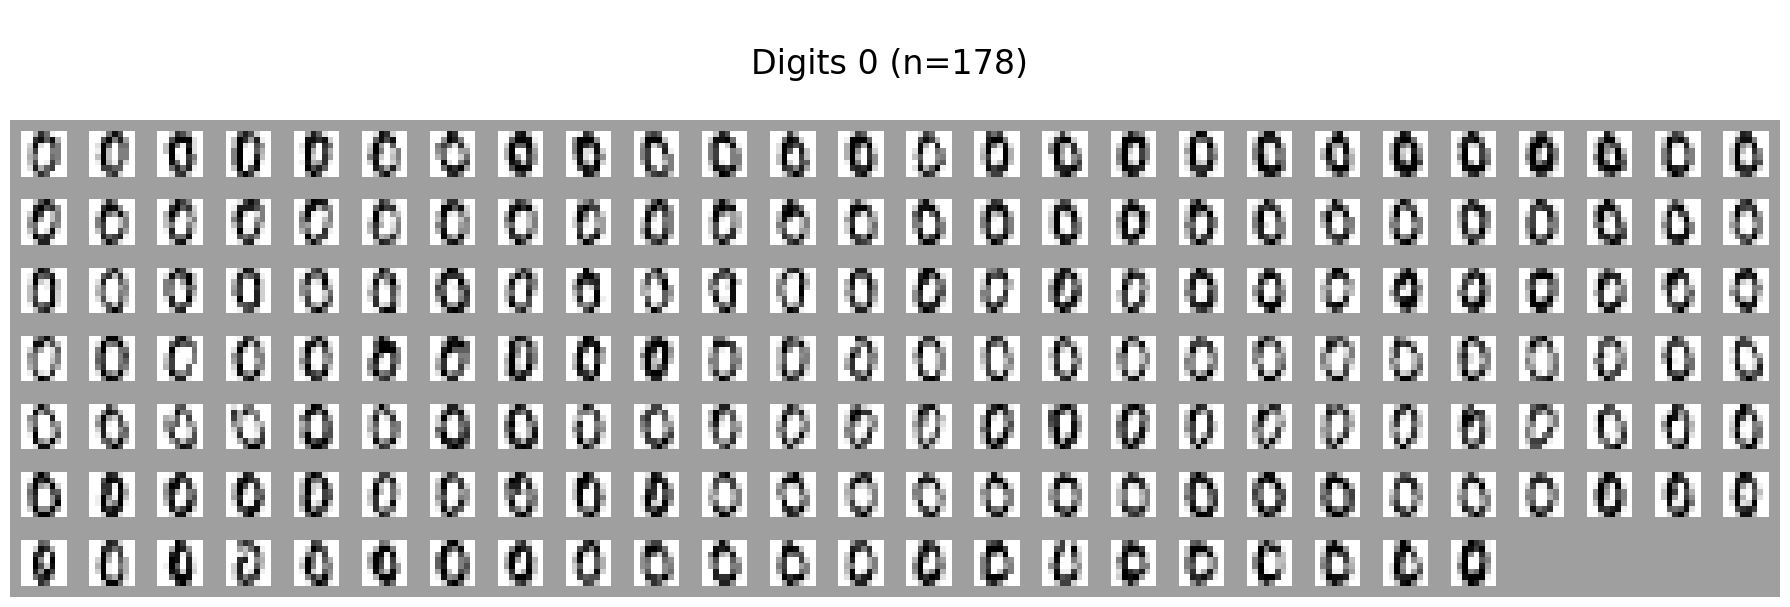

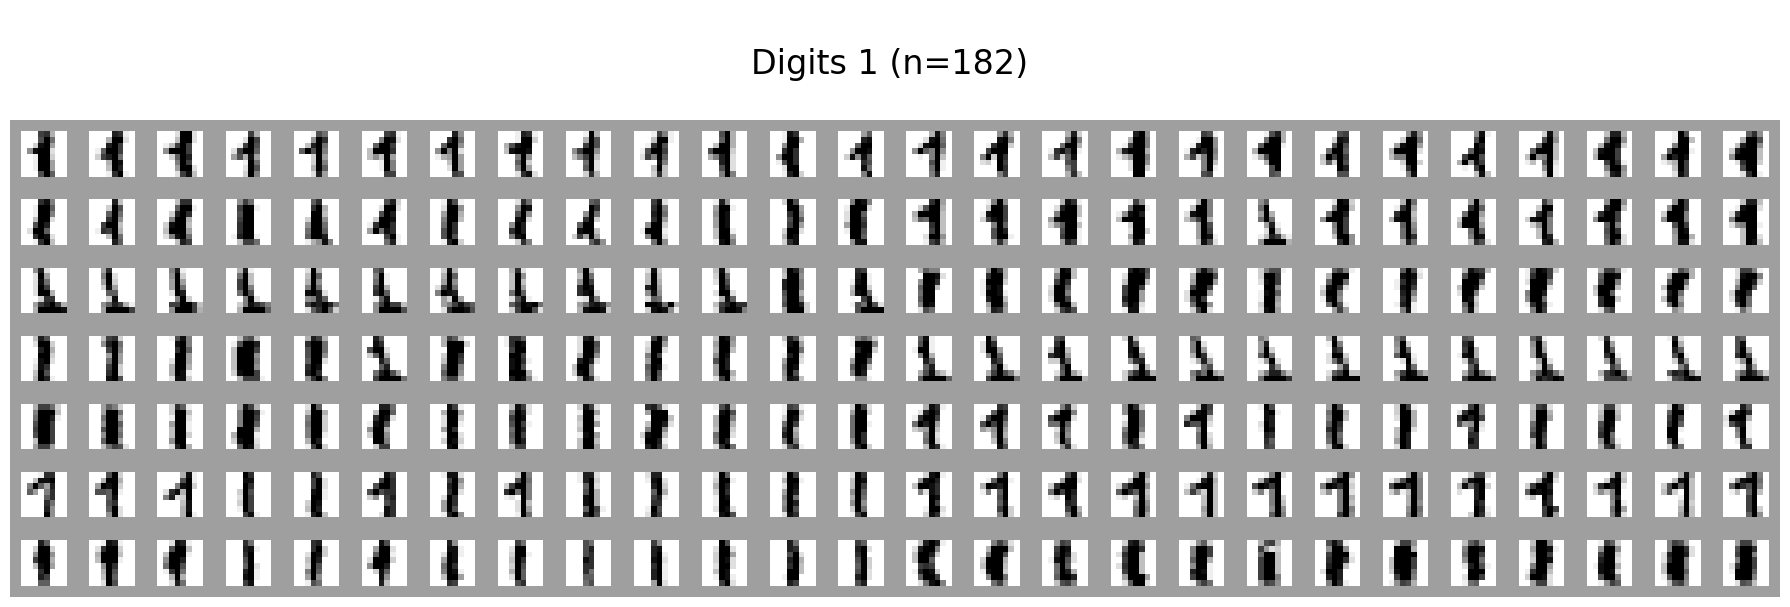

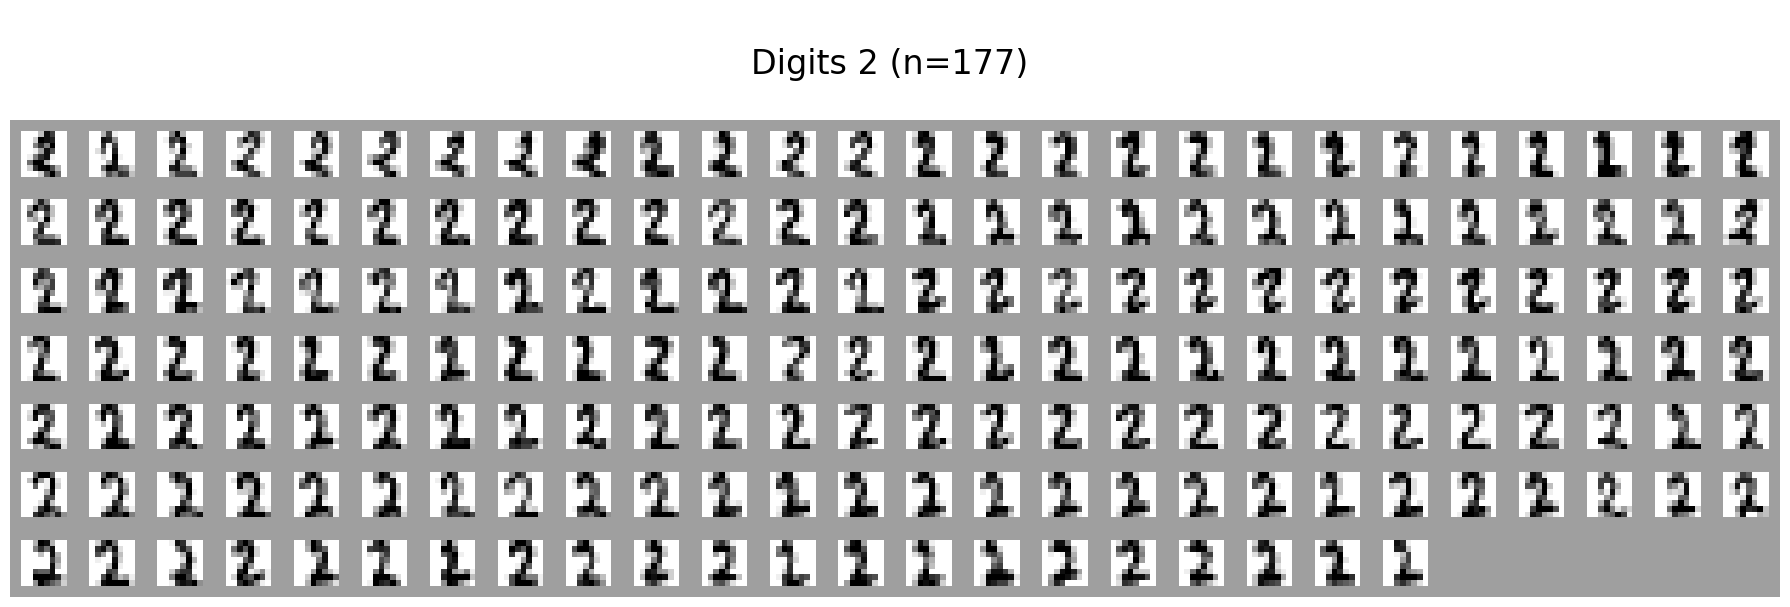

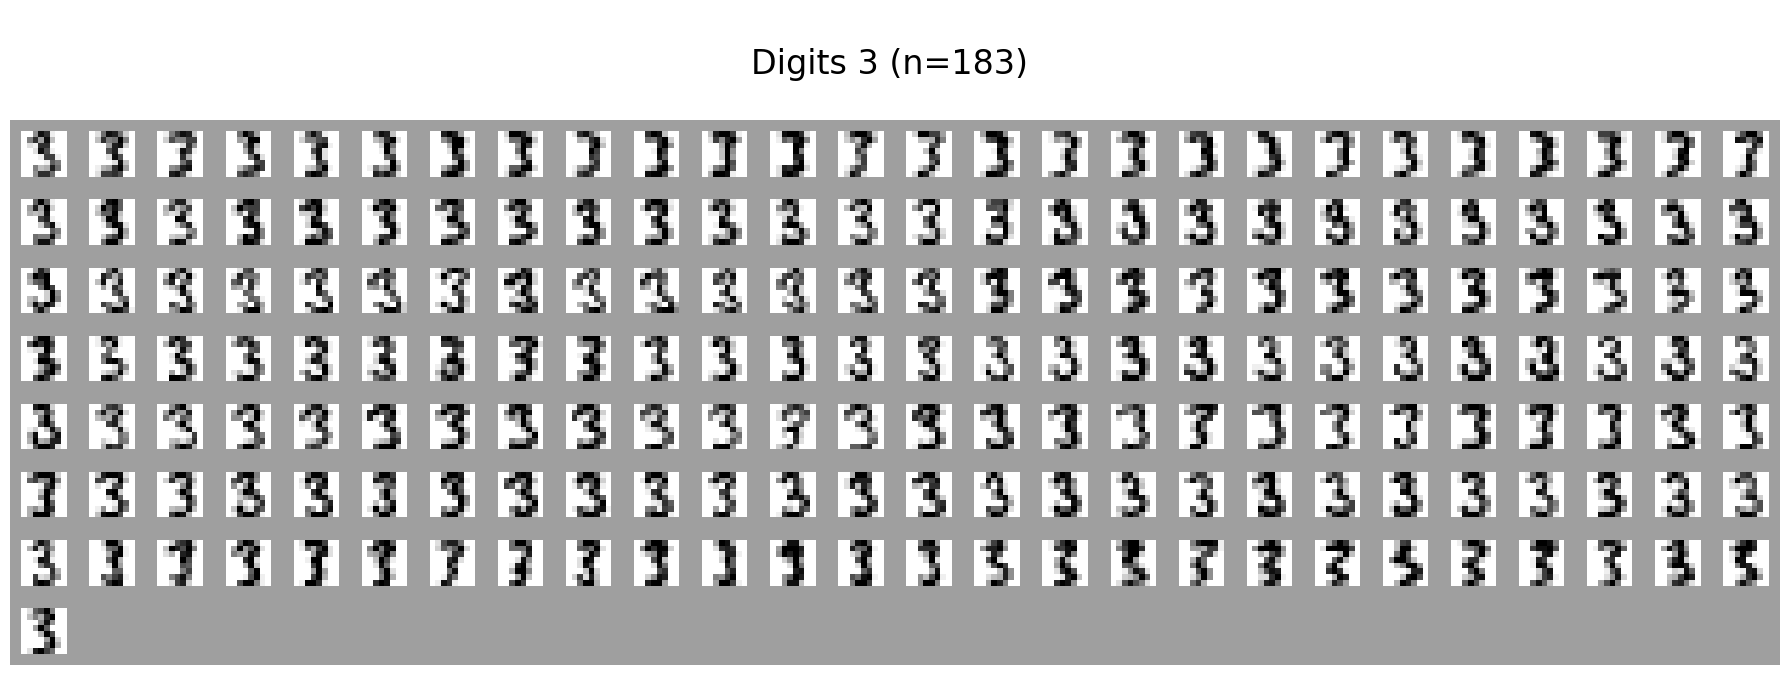

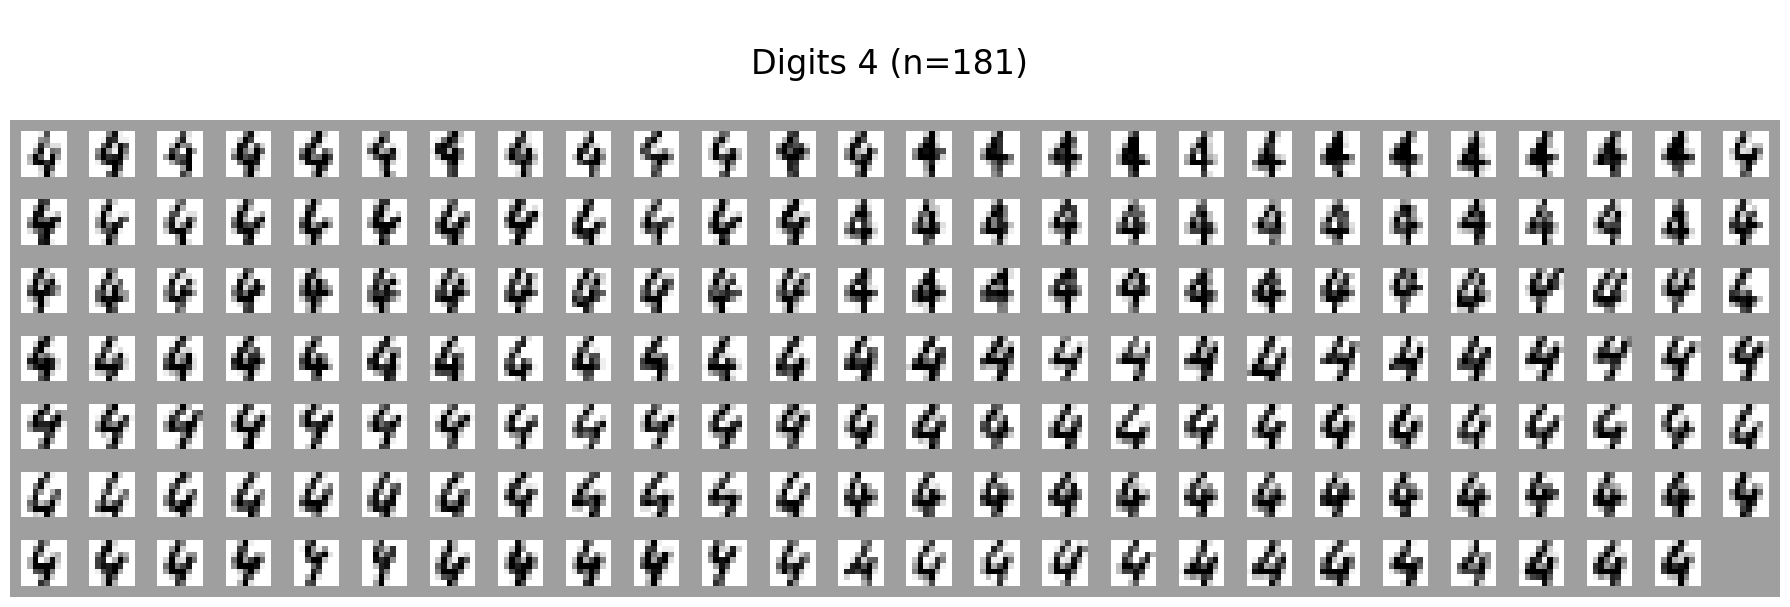

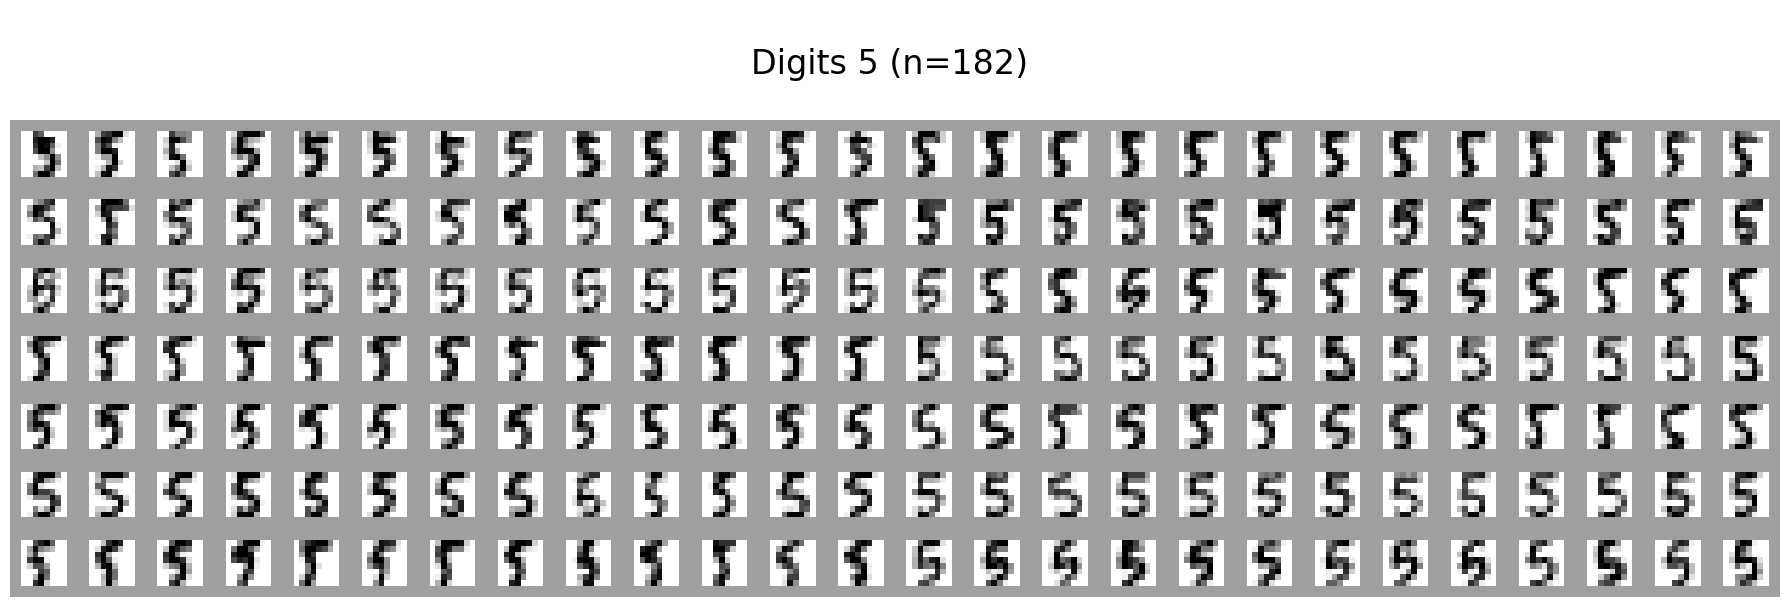

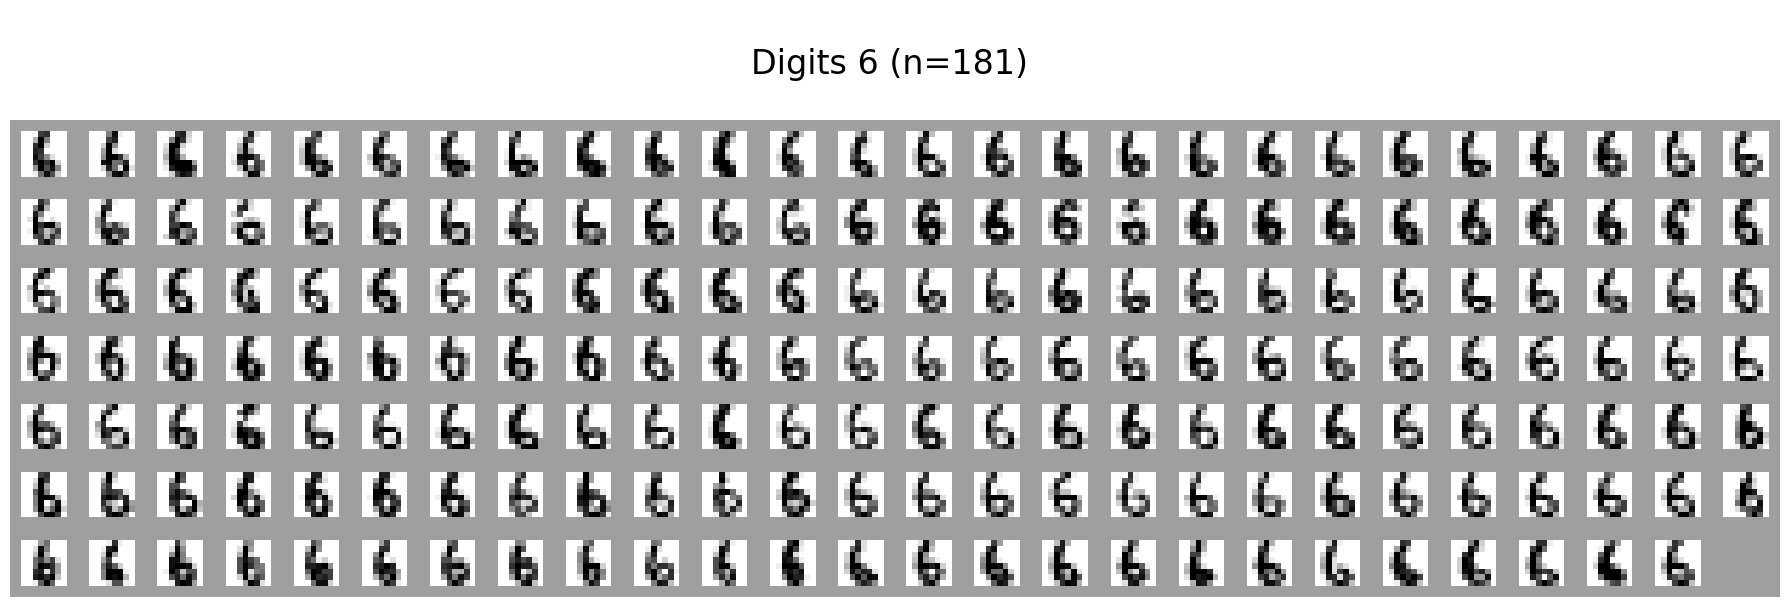

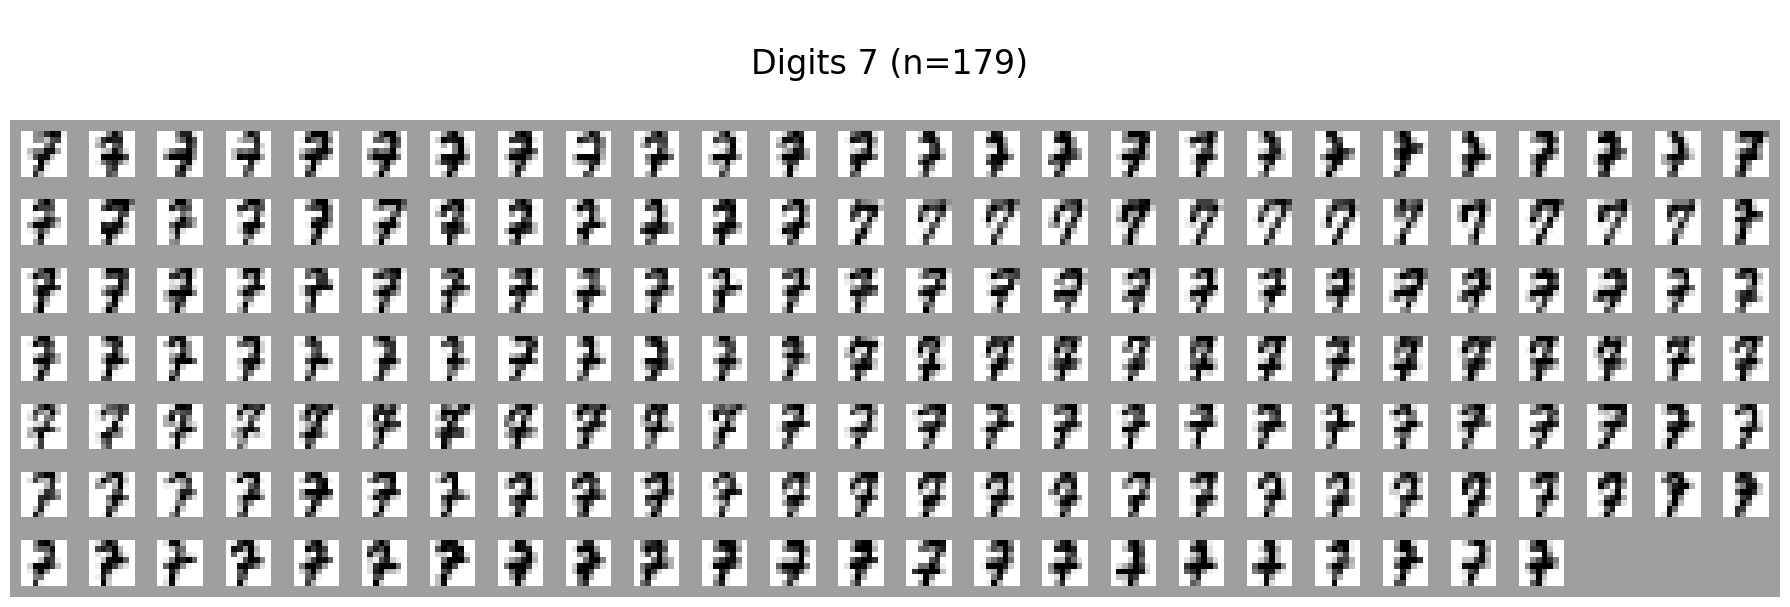

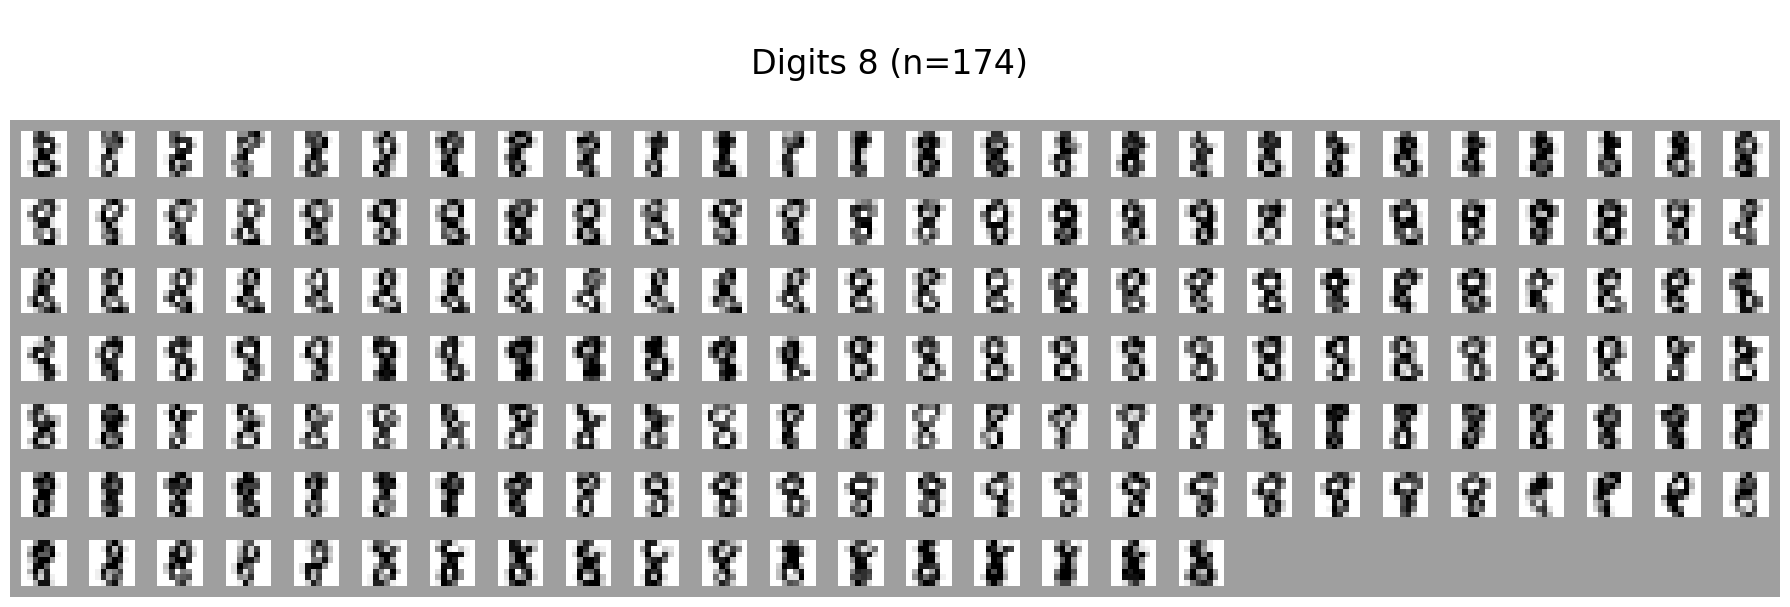

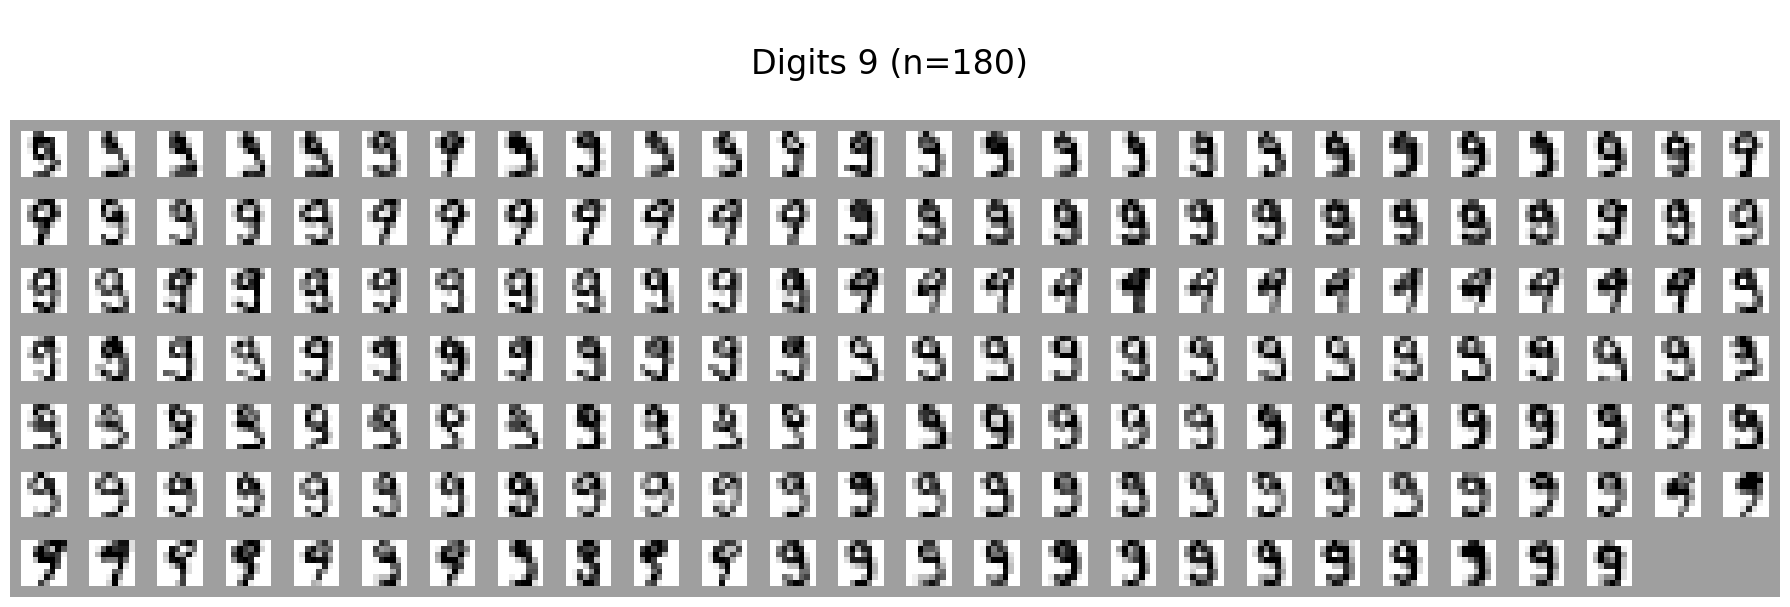

In [22]:
for digit in range(10):
    X_digit = X[y == digit].reshape(-1, 8, 8)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 30))

    ax.set_title(f"\nDigits {digit} (n={len(X_digit)}) \n", fontsize=24)
    ax.axis("off")

    ax.imshow(
        make_panel_image(X_digit, pad_width=2, background_fill=6, images_per_row=26),
        cmap=plt.cm.gray_r,
    )

    fig.tight_layout()
    fig.show()

    mlflow.log_figure(fig, f"logged-images/digits/{digit}-images.png")

In [23]:
###